## Here is the background information on your task
British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
!pip install request


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [8]:
df.to_csv("BA_reviews.csv")

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
df = pd.read_csv("BA_reviews.csv")
df

,Unnamed: 0,reviews
0,0,Not Verified | Top Ten REASONS to not use Brit...
1,1,Not Verified | Easy check in on the way to He...
2,2,✅ Trip Verified | Online check in worked fine...
3,3,✅ Trip Verified |. The BA first lounge at Term...
4,4,Not Verified | Paid a quick visit to Nice yest...
...,...,...
995,995,✅ Trip Verified | Aberdeen to Boston via Lond...
996,996,✅ Trip Verified | London to Hamburg. Baggage ...
997,997,✅ Trip Verified | Flew London Heathrow to Hong...
998,998,✅ Trip Verified | Flew to Istanbul with Britis...


# Pre-processing

In [11]:
# Droping index Column
df.rename( columns={'Unnamed: 0':'index'}, inplace=True )

In [12]:
# df=df.drop('index' , axis=True)
df1=df['index']

In [13]:
df = pd.DataFrame(df.reviews.str.split('|',1).tolist(),columns = ['verification','reviews'])


<ipython-input-13-a4a630260809>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df = pd.DataFrame(df.reviews.str.split('|',1).tolist(),columns = ['verification','reviews'])


In [14]:
df

,verification,reviews
0,Not Verified,Top Ten REASONS to not use British Airways To...
1,Not Verified,Easy check in on the way to Heathrow. The fl...
2,✅ Trip Verified,Online check in worked fine. Quick security ...
3,✅ Trip Verified,. The BA first lounge at Terminal 5 was a zoo...
4,Not Verified,Paid a quick visit to Nice yesterday from Hea...
...,...,...
995,✅ Trip Verified,Aberdeen to Boston via London Heathrow. I fo...
996,✅ Trip Verified,London to Hamburg. Baggage self-check-in was...
997,✅ Trip Verified,Flew London Heathrow to Hong Kong with Britis...
998,✅ Trip Verified,Flew to Istanbul with British Airways on 5th ...


In [15]:
df['verification'] = df['verification'].apply(lambda x: x.strip())
df.loc[df["verification"] == "Not Verified", "verification"] = 0
df.loc[df["verification"] == "✅ Trip Verified", "verification"] = 1
df

,verification,reviews
0,0,Top Ten REASONS to not use British Airways To...
1,0,Easy check in on the way to Heathrow. The fl...
2,1,Online check in worked fine. Quick security ...
3,1,. The BA first lounge at Terminal 5 was a zoo...
4,0,Paid a quick visit to Nice yesterday from Hea...
...,...,...
995,1,Aberdeen to Boston via London Heathrow. I fo...
996,1,London to Hamburg. Baggage self-check-in was...
997,1,Flew London Heathrow to Hong Kong with Britis...
998,1,Flew to Istanbul with British Airways on 5th ...


In [16]:
df.loc[df["verification"] == "❎ Not Verified", "verification"] = 0


In [17]:
df=pd.concat([df1,df] , axis=1)
df

,index,verification,reviews
0,0,0,Top Ten REASONS to not use British Airways To...
1,1,0,Easy check in on the way to Heathrow. The fl...
2,2,1,Online check in worked fine. Quick security ...
3,3,1,. The BA first lounge at Terminal 5 was a zoo...
4,4,0,Paid a quick visit to Nice yesterday from Hea...
...,...,...,...
995,995,1,Aberdeen to Boston via London Heathrow. I fo...
996,996,1,London to Hamburg. Baggage self-check-in was...
997,997,1,Flew London Heathrow to Hong Kong with Britis...
998,998,1,Flew to Istanbul with British Airways on 5th ...


# EDA

## Non - Graphical approch

In [18]:
df.describe()

,index
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [19]:
df.shape

(1000, 3)

In [20]:
df.isnull().count()

index           1000
verification    1000
reviews         1000
dtype: int64

In [21]:
df.dtypes

index            int64
verification    object
reviews         object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1000 non-null   int64 
 1   verification  1000 non-null   object
 2   reviews       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


# Graphical Approach

In [25]:
!pip install pandasql
import pandasql
from pandasql import sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=df9b609b52f228236050d902d4269dcffb51f69c5f462e567945397b17c28398
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [28]:
df

,index,verification,reviews
0,0,0,Top Ten REASONS to not use British Airways To...
1,1,0,Easy check in on the way to Heathrow. The fl...
2,2,1,Online check in worked fine. Quick security ...
3,3,1,. The BA first lounge at Terminal 5 was a zoo...
4,4,0,Paid a quick visit to Nice yesterday from Hea...
...,...,...,...
995,995,1,Aberdeen to Boston via London Heathrow. I fo...
996,996,1,London to Hamburg. Baggage self-check-in was...
997,997,1,Flew London Heathrow to Hong Kong with Britis...
998,998,1,Flew to Istanbul with British Airways on 5th ...


In [32]:
# sqldf(""select verification from df where verification not in (0,1)"")


<Axes: xlabel='verification', ylabel='count'>

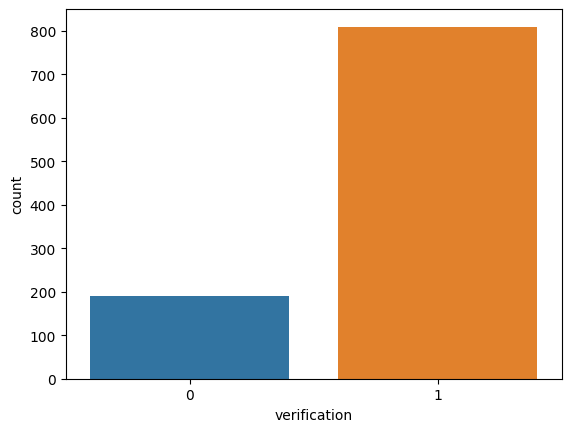

In [31]:
sns.countplot(x=df['verification'] , data=df)

# Vader : (valence Aware Dictionary and Sentiment Reasoner)

## This uses a "bag of words" approach
    !. stop words are removed
    2. each word is scored and combined to a total score

In [37]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [39]:
# !pip install nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [40]:
sia.polarity_scores('worst movie i have ever seen')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

Try it on example

In [41]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['reviews']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)
    
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
res

In [43]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = pd.concat([vaders,df],axis=1)

In [44]:
vaders[20:30]

,Id,neg,neu,pos,compound,index,verification,reviews
20,20,0.166,0.834,0.000,-0.8537,20,1,The ground staff were not helpful. Felt like...
21,21,0.052,0.677,0.270,0.9714,21,1,Second time BA Premium Economy in a newer ai...
22,22,0.096,0.866,0.038,-0.8055,22,0,They changed our Flights from Brussels to Lo...
23,23,0.099,0.763,0.138,0.1015,23,0,At Copenhagen the most chaotic ticket counte...
24,24,0.152,0.798,0.049,-0.9600,24,1,Worst experience of my life trying to deal w...
25,25,0.140,0.768,0.093,-0.8510,25,1,Due to code sharing with Cathay Pacific I wa...
26,26,0.053,0.856,0.091,0.9176,26,1,LHR check in was quick at the First Wing and...
27,27,0.113,0.857,0.031,-0.9372,27,1,I wouldn't recommend British Airways at all....
28,28,0.037,0.950,0.013,-0.5883,28,1,Absolutely horrible experience. I booked a t...
29,29,0.320,0.680,0.000,-0.9392,29,0,This is the worst airline. Not one thing wen...


In [50]:
_ = vaders['reviews'][21]
_

'  Second time BA Premium Economy in a newer aircraft and yet another excellent experience. Despite a three hour delay and missing my connection in Hong Kong, this was a very pleasant flight. Seats are spacious and comfortable in Premium Economy in this layout, attitude of the cabin crew was excellent and food was good. They communicate well and rebooked my connection during the flight which brought peace of mind. A very pleasant experience in BA Premium Economy after a major disappointment in Club World earlier this year.'

In [51]:
_ = vaders['reviews'][24]
_

'  Worst experience of my life trying to deal with the customer service for British Airways. So many issues with getting from one destination to the other. Had an absolutely horrible time trying to get answers or reach anyone who was capable of helping navigate uncertainties. I wrote them a formal complaint requesting some type of refund and received a generic “we are sorry” email with 5000 avios attached which is equivalent to maybe $50 on a $600+ flight. Needless to say these will go to waste as I refuse to fly with an untrustworthy incompetent unorganized airline that couldn’t even address one single issue expressed to them. It was equivalent to handing me a band aid after slapping me in the face. I will say the flight itself was smooth and the onboard staff was kind and attentive. The most frustrating thing is that the customer service is trained to give you the runaround so heavily to the point of exhaustion that you just give up trying and take the loss.'

## plot vaders result

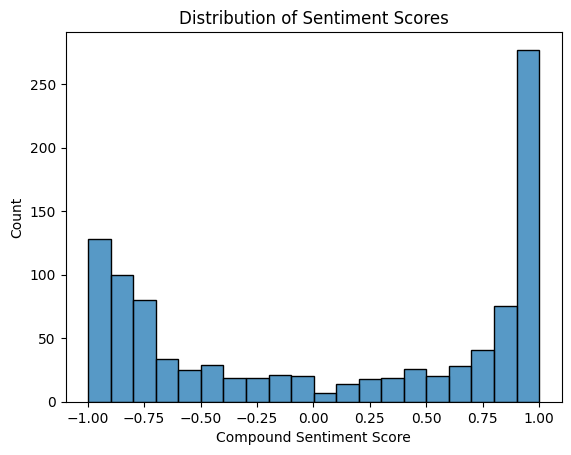

In [52]:
sns.histplot(data=vaders, x="compound", bins=20)
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Scores")
plt.show()

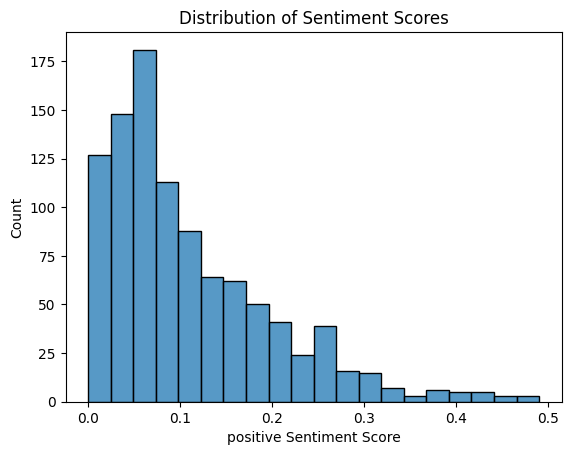

In [53]:
sns.histplot(data=vaders, x='pos', bins=20)
plt.xlabel("positive Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Scores")
plt.show()


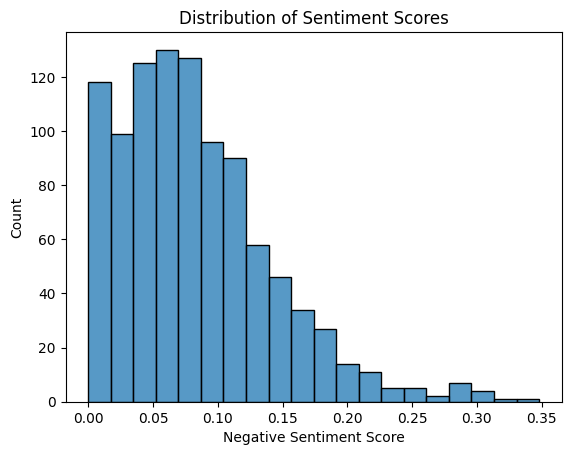

In [54]:
sns.histplot(data=vaders, x='neg', bins=20)
plt.xlabel("Negative Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Scores")
plt.show()

## Roberta Pretrained Model

### Transformer model accounts for the words but also the context related to other work

In [55]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00


In [56]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [57]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [59]:
# VADER results on example
example = df['reviews'][50]
print(example)
sia.polarity_scores(example)


 First time flying with British Airways and first time flying to the Americas from India via London Heathrow. I chose Premium Economy at a reasonable price. I was quite comfortable, however, the first leg of the flight from Mumbai to Heathrow, the plane was a bit outdated and there was only a foot rest. The second leg, from Heathrow to Nassau, the plane was brand new and my premium economy seat had a pop up leg support which was much more comfortable. Cabin service was fine - I appreciated that they didn't come through the cabin often while everyone was sleeping. The meals weren't that great to be honest. After landing in Heathrow, we had to wait on the tarmac for 45 minutes waiting for an open gate. My connection was less than an hour long! The BA staff in the Heathrow Airport helped me move through security quickly and I made it with time to spare for my next flight. When I arrived in Nassau, I found that my luggage didn't make it due to the short connection time in London. The BA ba

{'neg': 0.014, 'neu': 0.871, 'pos': 0.116, 'compound': 0.9739}

In [60]:
# run for Roberta
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores = output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.039919212, 'roberta_neu': 0.19938686, 'roberta_pos': 0.76069397}


In [61]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [62]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviews']
        myid = row['index']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 0
Broke for id 55
Broke for id 60
Broke for id 79
Broke for id 102
Broke for id 110
Broke for id 188
Broke for id 208
Broke for id 273
Broke for id 332
Broke for id 354
Broke for id 409
Broke for id 478
Broke for id 479
Broke for id 616
Broke for id 640
Broke for id 673
Broke for id 773
Broke for id 797
Broke for id 861
Broke for id 873
Broke for id 929
Broke for id 944
Broke for id 961
Broke for id 966
Broke for id 971
Broke for id 982


In [68]:
all_res = pd.DataFrame(res).T
all_res.tail()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
995,0.083,0.801,0.116,0.5879,0.255740,0.460861,0.283399
996,0.049,0.836,0.115,0.7165,0.324090,0.387775,0.288135
997,0.113,0.803,0.084,-0.5023,0.323955,0.409920,0.266126
998,0.043,0.889,0.068,0.6858,0.712960,0.256473,0.030567
999,0.064,0.786,0.150,0.9192,0.012972,0.072807,0.914221


In [66]:
df_all_res = pd.concat([all_res,df],axis=1)
df_all_res.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,verification,reviews
1,0.066,0.880,0.054,-0.0516,0.013518,0.109432,0.877049,1,0,Easy check in on the way to Heathrow. The fl...
2,0.000,0.702,0.298,0.8479,0.002139,0.034535,0.963326,2,1,Online check in worked fine. Quick security ...
3,0.100,0.827,0.073,-0.1289,0.818131,0.154603,0.027266,3,1,. The BA first lounge at Terminal 5 was a zoo...
4,0.058,0.808,0.134,0.9763,0.405677,0.407842,0.186481,4,0,Paid a quick visit to Nice yesterday from Hea...
5,0.193,0.751,0.056,-0.9746,0.952619,0.040903,0.006478,5,1,Words fail to describe this last awful fligh...


In [67]:
df_all_res.columns

Index(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'index', 'verification', 'reviews'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

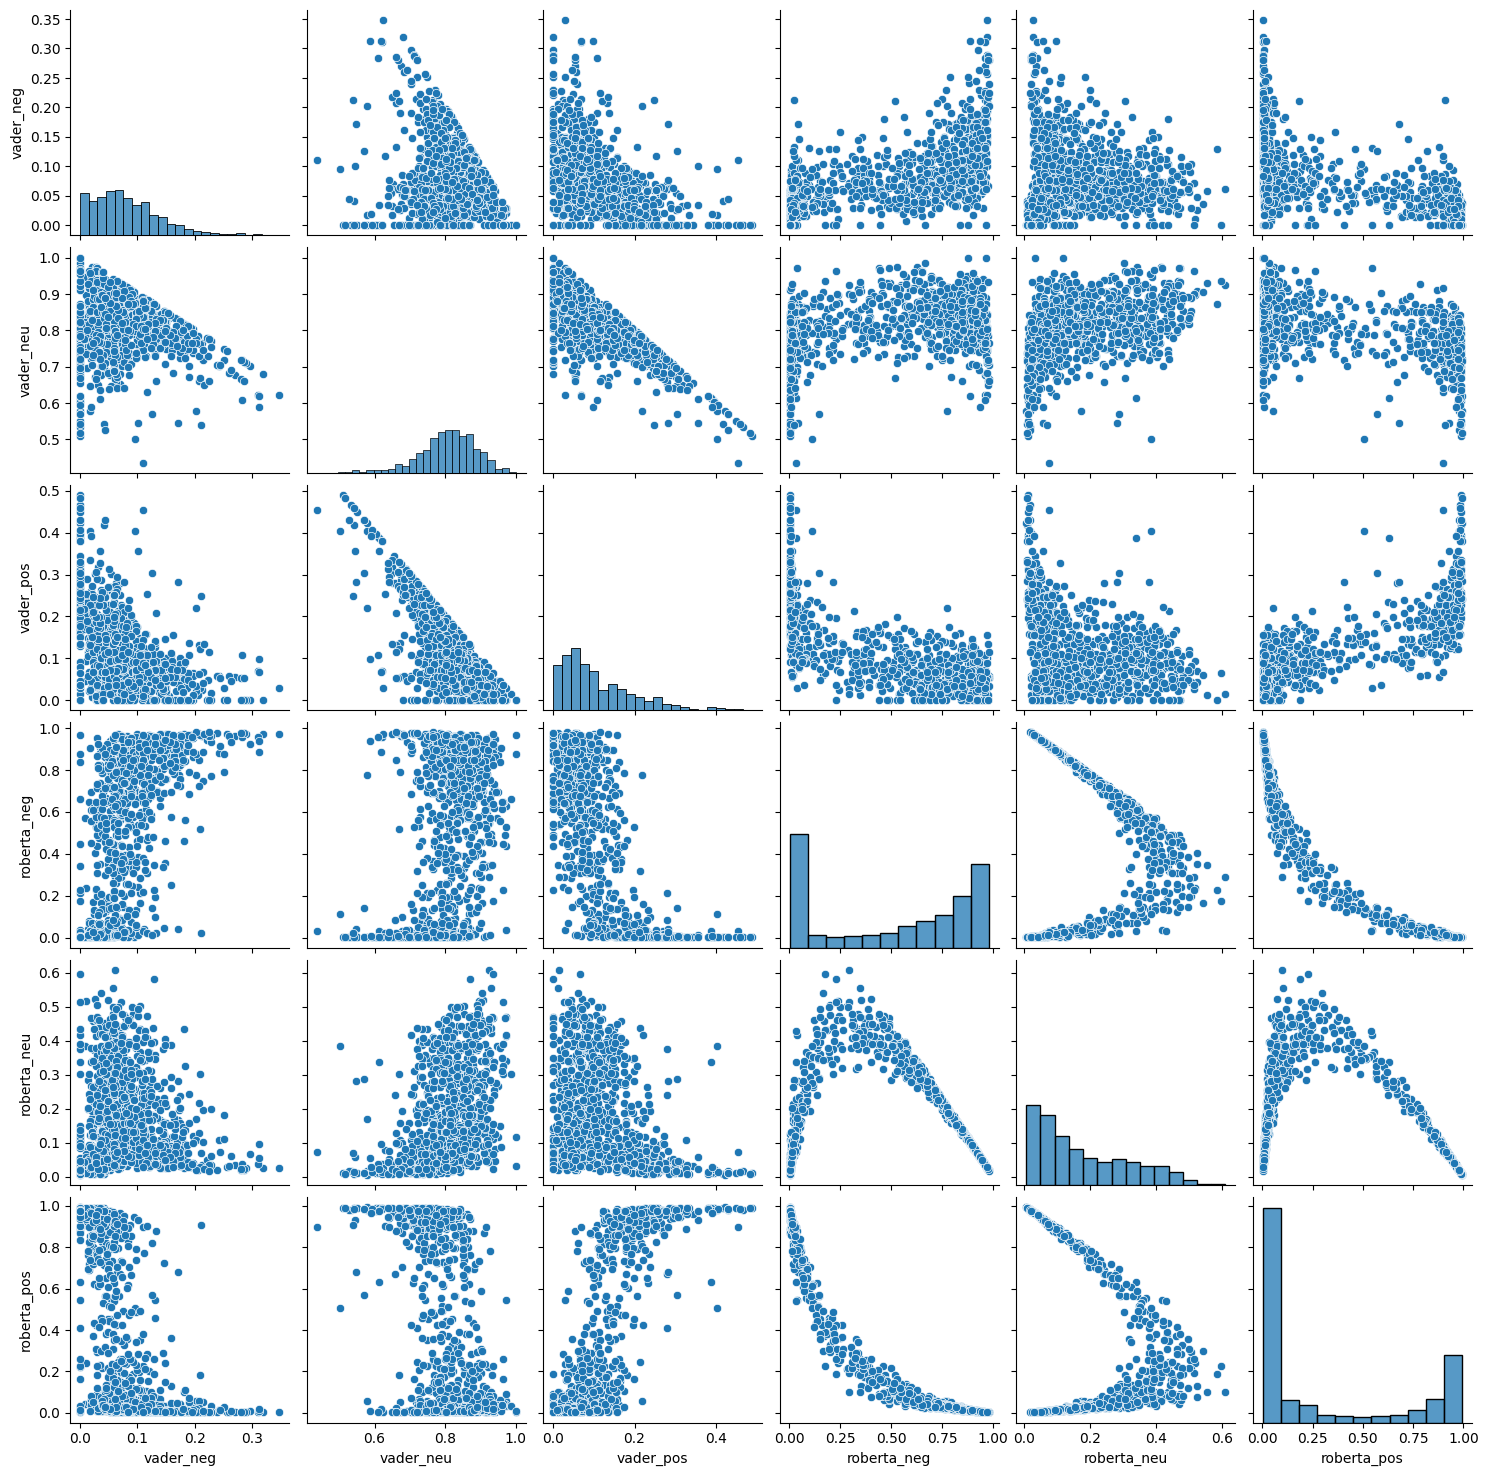

In [70]:
sns.pairplot(data=df_all_res,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10')
plt.show()

In [71]:
!pip install --quiet pandasql

## Taking Top 10 positive Comment

In [81]:
import duckdb
duckdb.query('select index , roberta_pos from df_all_res where roberta_pos is not NULL order by roberta_pos desc limit 10 ')

┌───────┬────────────────────┐
│ index │    roberta_pos     │
│ int64 │       double       │
├───────┼────────────────────┤
│   364 │ 0.9928299784660339 │
│   357 │ 0.9911808967590332 │
│   754 │ 0.9911290407180786 │
│   814 │ 0.9910386204719543 │
│   516 │ 0.9907213449478149 │
│   779 │ 0.9898173213005066 │
│   931 │ 0.9897992610931396 │
│   891 │ 0.9892510175704956 │
│   820 │ 0.9890782237052917 │
│   162 │  0.988867998123169 │
├───────┴────────────────────┤
│ 10 rows          2 columns │
└────────────────────────────┘

In [92]:
df_all_res['reviews'][364]

'  The crew at Denver airport is top notch! So impressed with their customer service. They were very patient and courteous. Thank you all for being amazing.'

In [93]:
df_all_res['reviews'][162]

'  I would like to thank all the air and cabin crew for having the best experience with a very long journey! I don’t know how you manage to keep smiling. Couldn’t fault anything. Helpful, reassuring, excellent food and I can’t wait to fly again. Thank you and I really appreciated you.'

## Taking Top 10 Negative Comments

In [88]:
neg=duckdb.query('select index , roberta_neg from df_all_res where roberta_neg is not NULL order by roberta_neg desc limit 10 ')
neg

┌───────┬────────────────────┐
│ index │    roberta_neg     │
│ int64 │       double       │
├───────┼────────────────────┤
│   928 │ 0.9789378046989441 │
│   775 │ 0.9785599112510681 │
│   455 │ 0.9782388806343079 │
│   167 │ 0.9768706560134888 │
│   432 │ 0.9760714769363403 │
│   497 │ 0.9758979678153992 │
│   900 │ 0.9752238392829895 │
│   954 │ 0.9748311042785645 │
│   288 │ 0.9729002714157104 │
│   853 │ 0.9728102684020996 │
├───────┴────────────────────┤
│ 10 rows          2 columns │
└────────────────────────────┘

In [87]:
duckdb.query('select index , reviews , roberta_neg from df_all_res natural join neg limit 2')

┌───────┬─────────────────────────────────────────────────────────────────────────────────────────┬────────────────────┐
│ index │                                         reviews                                         │    roberta_neg     │
│ int64 │                                         varchar                                         │       double       │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────┼────────────────────┤
│   167 │  London to Manchester. British Airways is probably the worst air company I have ever …  │ 0.9768706560134888 │
│   288 │   Absolutely shambolic customer service. The lounges at Heathrow are outdated and the…  │ 0.9729002714157104 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────────┴────────────────────┘

In [90]:
df_all_res['reviews'][167]

' London to Manchester. British Airways is probably the worst air company I have ever flown with they took 2 hours to unload the luggage and the flight was delayed by an hour. The staff were no help and frankly rude.'

In [91]:
df_all_res['reviews'][288]

'  Absolutely shambolic customer service. The lounges at Heathrow are outdated and the service was terrible, waited over an hour for my chosen food/drink order to be brought to me. Ended up getting it myself and told off for doing so. On board product is average. '

## Top 10 Neutral Comments

In [94]:
duckdb.query('select index , roberta_neu from df_all_res where roberta_neu is not NULL order by roberta_neu desc limit 10 ')

┌───────┬────────────────────┐
│ index │    roberta_neu     │
│ int64 │       double       │
├───────┼────────────────────┤
│   466 │ 0.6089916825294495 │
│   687 │ 0.5965964794158936 │
│   825 │ 0.5825583934783936 │
│   578 │ 0.5545713305473328 │
│   539 │ 0.5395247936248779 │
│    44 │ 0.5235759615898132 │
│    97 │ 0.5215370655059814 │
│   116 │ 0.5179685354232788 │
│   191 │ 0.5141633152961731 │
│   952 │ 0.5136077404022217 │
├───────┴────────────────────┤
│ 10 rows          2 columns │
└────────────────────────────┘

In [95]:
df_all_res['reviews'][466]

'  Dubai to London. My husband and I traveled together. He got business class, my ticket was a last minute add-on, so was Premium Economy instead. After we boarded, my husband came to me to give me his pillow, so I got settled and started sleeping. I was woken up by a flight attendant who grabbed the pillow that my husband gave me and saying that, There is a lady in business class is missing a pillow, did I take the pillow. I told her I didn’t, and the pillow was given to me. I stood up and told her it wasn’t Ok for her to accuse me of stealing a pillow, and I’ll show her whom my husband is who gave me the pillow. I located my husband in the business class, apparently, his seat had 1 extra pillow and so he gave me the extra one. He offered to give his pillow to the flight attendant who said there was no need and he could keep it.'

In [96]:
df_all_res['reviews'][687]

"  Frankfurt to London. BA staff watched while security went through partner's bag for around 30 mins. It required a call to police who sauntered up and stared at the bag for a while - actually just clothes. When they were finishing the flight dispatcher closed the flight. Only 1-2 minutes required. Much longer spent unloading my luggage. We had checked this bag in almost 2 hours previously and arrived at security in plenty of time."

In [97]:
df_all_res['reviews'][44]

'  BA changed our prepaid seats at the last minute and charged us to select new seats. Flight took off late, cabin crew served a tiny packet of pretzels. Arrived at Heathrow late, put on a remote stand, loaded onto buses to terminal. Held up at transit security by a clown of a member of staff, allowed 15 passengers at a time because of a trial. Queued at security for 20 minutes. '

In [99]:
df_all_res.query('verification == 0').sort_values('vader_compound' , ascending=False )

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,verification,reviews
41,0.085,0.677,0.238,0.9980,0.100236,0.194951,0.704813,41,0,"Mexico City Airport is a zoo, but taking the ..."
604,0.021,0.758,0.221,0.9951,0.068802,0.194861,0.736337,604,0,We have had some torrid experiences with BA -...
502,0.045,0.752,0.202,0.9945,0.019870,0.091466,0.888665,502,0,Keflavik to London Heathrow. Cabin crew were ...
156,0.027,0.777,0.196,0.9918,0.229633,0.346216,0.424151,156,0,DFW-LHR. Had an easy transfer at DFW from Am...
638,0.065,0.727,0.208,0.9912,0.081662,0.214167,0.704171,638,0,Good morning. I would like to write a review...
...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Top Ten REASONS to not use British Airways To...
273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273,0,Very poor flight from Cape Town to London. A...
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354,0,What has happened to British Airways? The wh...
929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929,0,Calgary to Rome via London. My wife and I bo...


In [ ]:
from sqlalchemy.sql.expression import null
res_roberta={}
for i,row in tqdm(df_all_res.iterrows(),total=len(df_all_res)):
  id=row['index']
  max_val = max(row['roberta_neg'],row['roberta_neu'],row['roberta_pos'])
  if max_val == null:
    res_roberta[id] = null
  elif max_val == row['roberta_neg']:
    res_roberta[id] = -1
  elif max_val == row['roberta_neu']:
    res_roberta[id] = 0
  elif max_val == row['roberta_pos']:
    res_roberta[id] = 1
  

res_roberta

In [141]:
df_res_roberta = pd.DataFrame(res_roberta,index=['result']).T
df_res_roberta.head(10)


,result
1,1
2,1
3,-1
4,0
5,-1
6,-1
7,-1
8,-1
9,-1
10,-1


<Axes: xlabel='result', ylabel='count'>

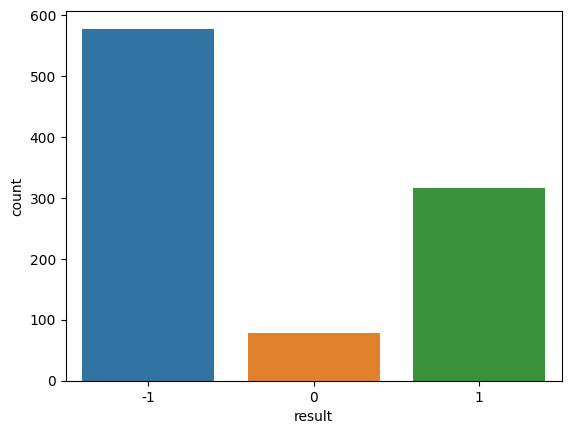

In [142]:
sns.countplot(x='result',data=df_res_roberta)

In [103]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [109]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.8864362835884094}]

In [111]:
res_1 = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
      text = row['reviews']
      myid = row['index']
      res_1[myid] = sent_pipeline(text)
    except:
      print(myid , "is ignored")

  0%|          | 0/1000 [00:00<?, ?it/s]

0 is ignored
41 is ignored
55 is ignored
60 is ignored
79 is ignored
102 is ignored
110 is ignored
148 is ignored
188 is ignored
208 is ignored
273 is ignored
332 is ignored
354 is ignored
409 is ignored
478 is ignored
479 is ignored
616 is ignored
640 is ignored
673 is ignored
773 is ignored
797 is ignored
861 is ignored
873 is ignored
929 is ignored
944 is ignored
961 is ignored
966 is ignored
971 is ignored
982 is ignored


In [122]:
for k , v in res_1.items():
  res_1[k]=v[0]

res_1



In [126]:
df_res1 = pd.DataFrame(res_1).T
df_res1

,label,score
1,NEGATIVE,0.715898
2,POSITIVE,0.99955
3,NEGATIVE,0.990542
4,POSITIVE,0.565853
5,NEGATIVE,0.999644
...,...,...
995,NEGATIVE,0.985637
996,NEGATIVE,0.96883
997,NEGATIVE,0.998506
998,NEGATIVE,0.999561


In [127]:
df_res1.loc[df_res1['label'] == "POSITIVE" , 'label'] = 1
df_res1.loc[df_res1['label'] == "NEGATIVE" , 'label'] = -1
df_res1

,label,score
1,-1,0.715898
2,1,0.99955
3,-1,0.990542
4,1,0.565853
5,-1,0.999644
...,...,...
995,-1,0.985637
996,-1,0.96883
997,-1,0.998506
998,-1,0.999561


<Axes: xlabel='label', ylabel='count'>

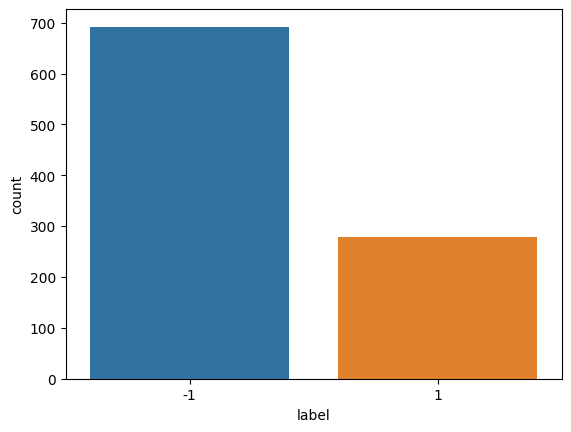

In [128]:
sns.countplot(x='label',data=df_res1)

## Above plot basically tells us that British Airways has more Negative Reviews tham positive one , so they really need to impove their Service Standared as we can see travellers were not happy to fly with them  